In [42]:
import requests
import pandas as pd

url = "https://dummyjson.com/products"

# Send request
response = requests.get(url)
response.raise_for_status()

# Parse JSON response
data = response.json()

# Extract products list
products = data["products"]

# Convert to DataFrame
df = pd.DataFrame(products)

# Preview data
print(df.head())

# Optional: save to CSV
df.to_csv("products.csv", index=False)


   id                          title  \
0   1  Essence Mascara Lash Princess   
1   2  Eyeshadow Palette with Mirror   
2   3                Powder Canister   
3   4                   Red Lipstick   
4   5                Red Nail Polish   

                                         description category  price  \
0  The Essence Mascara Lash Princess is a popular...   beauty   9.99   
1  The Eyeshadow Palette with Mirror offers a ver...   beauty  19.99   
2  The Powder Canister is a finely milled setting...   beauty  14.99   
3  The Red Lipstick is a classic and bold choice ...   beauty  12.99   
4  The Red Nail Polish offers a rich and glossy r...   beauty   8.99   

   discountPercentage  rating  stock                   tags           brand  \
0               10.48    2.56     99      [beauty, mascara]         Essence   
1               18.19    2.86     34    [beauty, eyeshadow]  Glamour Beauty   
2                9.84    4.64     89  [beauty, face powder]    Velvet Touch   
3         

In [43]:
df.head()

,id,title,description,category,price,discountPercentage,rating,stock,tags,brand,...,dimensions,warrantyInformation,shippingInformation,availabilityStatus,reviews,returnPolicy,minimumOrderQuantity,meta,images,thumbnail
0,1,Essence Mascara Lash Princess,The Essence Mascara Lash Princess is a popular...,beauty,9.99,10.48,2.56,99,"[beauty, mascara]",Essence,...,"{'width': 15.14, 'height': 13.08, 'depth': 22.99}",1 week warranty,Ships in 3-5 business days,In Stock,"[{'rating': 3, 'comment': 'Would not recommend...",No return policy,48,"{'createdAt': '2025-04-30T09:41:02.053Z', 'upd...",[https://cdn.dummyjson.com/product-images/beau...,https://cdn.dummyjson.com/product-images/beaut...
1,2,Eyeshadow Palette with Mirror,The Eyeshadow Palette with Mirror offers a ver...,beauty,19.99,18.19,2.86,34,"[beauty, eyeshadow]",Glamour Beauty,...,"{'width': 9.26, 'height': 22.47, 'depth': 27.67}",1 year warranty,Ships in 2 weeks,In Stock,"[{'rating': 5, 'comment': 'Great product!', 'd...",7 days return policy,20,"{'createdAt': '2025-04-30T09:41:02.053Z', 'upd...",[https://cdn.dummyjson.com/product-images/beau...,https://cdn.dummyjson.com/product-images/beaut...
2,3,Powder Canister,The Powder Canister is a finely milled setting...,beauty,14.99,9.84,4.64,89,"[beauty, face powder]",Velvet Touch,...,"{'width': 29.27, 'height': 27.93, 'depth': 20.59}",3 months warranty,Ships in 1-2 business days,In Stock,"[{'rating': 4, 'comment': 'Would buy again!', ...",No return policy,22,"{'createdAt': '2025-04-30T09:41:02.053Z', 'upd...",[https://cdn.dummyjson.com/product-images/beau...,https://cdn.dummyjson.com/product-images/beaut...
3,4,Red Lipstick,The Red Lipstick is a classic and bold choice ...,beauty,12.99,12.16,4.36,91,"[beauty, lipstick]",Chic Cosmetics,...,"{'width': 18.11, 'height': 28.38, 'depth': 22.17}",3 year warranty,Ships in 1 week,In Stock,"[{'rating': 4, 'comment': 'Great product!', 'd...",7 days return policy,40,"{'createdAt': '2025-04-30T09:41:02.053Z', 'upd...",[https://cdn.dummyjson.com/product-images/beau...,https://cdn.dummyjson.com/product-images/beaut...
4,5,Red Nail Polish,The Red Nail Polish offers a rich and glossy r...,beauty,8.99,11.44,4.32,79,"[beauty, nail polish]",Nail Couture,...,"{'width': 21.63, 'height': 16.48, 'depth': 29.84}",1 month warranty,Ships overnight,In Stock,"[{'rating': 2, 'comment': 'Poor quality!', 'da...",No return policy,22,"{'createdAt': '2025-04-30T09:41:02.053Z', 'upd...",[https://cdn.dummyjson.com/product-images/beau...,https://cdn.dummyjson.com/product-images/beaut...


In [44]:
import requests
import pandas as pd

# Pagination parameters
limit = 30
skip = 0
all_products = []

# Fetch all products
while True:
    url = f"https://dummyjson.com/products?limit={limit}&skip={skip}"
    response = requests.get(url)
    response.raise_for_status()
    data = response.json()

    products = data["products"]
    all_products.extend(products)

    if skip + limit >= data["total"]:
        break
    skip += limit

print(f"Total products fetched: {len(all_products)}")

# Prepare structured products DataFrame
product_rows = []
reviews_rows = []

for product in all_products:
    # Flatten product info
    product_row = {
        "id": product["id"],
        "title": product["title"],
        "description": product["description"],
        "category": product["category"],
        "price": product["price"],
        "discountPercentage": product.get("discountPercentage", None),
        "rating": product.get("rating", None),
        "stock": product.get("stock", None),
        "brand": product.get("brand", None),
        "sku": product.get("sku", None),
        "weight": product.get("weight", None),
        "warrantyInformation": product.get("warrantyInformation", None),
        "shippingInformation": product.get("shippingInformation", None),
        "availabilityStatus": product.get("availabilityStatus", None),
        "returnPolicy": product.get("returnPolicy", None),
        "minimumOrderQuantity": product.get("minimumOrderQuantity", None),

        # Flatten dimensions
        "dimensions_width": product.get("dimensions", {}).get("width", None),
        "dimensions_height": product.get("dimensions", {}).get("height", None),
        "dimensions_depth": product.get("dimensions", {}).get("depth", None),

        # Flatten meta
        "meta_createdAt": product.get("meta", {}).get("createdAt", None),
        "meta_updatedAt": product.get("meta", {}).get("updatedAt", None),
        "meta_barcode": product.get("meta", {}).get("barcode", None),
        "meta_qrCode": product.get("meta", {}).get("qrCode", None),

        # Lists → strings
        "tags": ", ".join(product.get("tags", [])),
        "images": ", ".join(product.get("images", [])),
        "thumbnail": product.get("thumbnail", None),
    }
    product_rows.append(product_row)

    # Extract reviews
    for review in product.get("reviews", []):
        reviews_rows.append({
            "product_id": product["id"],
            "rating": review.get("rating", None),
            "comment": review.get("comment", None),
            "date": review.get("date", None),
            "reviewerName": review.get("reviewerName", None),
            "reviewerEmail": review.get("reviewerEmail", None),
        })

# Create DataFrames
df_products = pd.DataFrame(product_rows)
df_reviews = pd.DataFrame(reviews_rows)

# Preview
print(df_products.head())
print(df_reviews.head())

# Optional: Save to CSV
#df_products.to_csv("products.csv", index=False)
#df_reviews.to_csv("product_reviews.csv", index=False)


Total products fetched: 194
   id                          title  \
0   1  Essence Mascara Lash Princess   
1   2  Eyeshadow Palette with Mirror   
2   3                Powder Canister   
3   4                   Red Lipstick   
4   5                Red Nail Polish   

                                         description category  price  \
0  The Essence Mascara Lash Princess is a popular...   beauty   9.99   
1  The Eyeshadow Palette with Mirror offers a ver...   beauty  19.99   
2  The Powder Canister is a finely milled setting...   beauty  14.99   
3  The Red Lipstick is a classic and bold choice ...   beauty  12.99   
4  The Red Nail Polish offers a rich and glossy r...   beauty   8.99   

   discountPercentage  rating  stock           brand              sku  ...  \
0               10.48    2.56     99         Essence  BEA-ESS-ESS-001  ...   
1               18.19    2.86     34  Glamour Beauty  BEA-GLA-EYE-002  ...   
2                9.84    4.64     89    Velvet Touch  BEA-VEL-PO

In [45]:
df_products.head()

,id,title,description,category,price,discountPercentage,rating,stock,brand,sku,...,dimensions_width,dimensions_height,dimensions_depth,meta_createdAt,meta_updatedAt,meta_barcode,meta_qrCode,tags,images,thumbnail
0,1,Essence Mascara Lash Princess,The Essence Mascara Lash Princess is a popular...,beauty,9.99,10.48,2.56,99,Essence,BEA-ESS-ESS-001,...,15.14,13.08,22.99,2025-04-30T09:41:02.053Z,2025-04-30T09:41:02.053Z,5784719087687,https://cdn.dummyjson.com/public/qr-code.png,"beauty, mascara",https://cdn.dummyjson.com/product-images/beaut...,https://cdn.dummyjson.com/product-images/beaut...
1,2,Eyeshadow Palette with Mirror,The Eyeshadow Palette with Mirror offers a ver...,beauty,19.99,18.19,2.86,34,Glamour Beauty,BEA-GLA-EYE-002,...,9.26,22.47,27.67,2025-04-30T09:41:02.053Z,2025-04-30T09:41:02.053Z,9170275171413,https://cdn.dummyjson.com/public/qr-code.png,"beauty, eyeshadow",https://cdn.dummyjson.com/product-images/beaut...,https://cdn.dummyjson.com/product-images/beaut...
2,3,Powder Canister,The Powder Canister is a finely milled setting...,beauty,14.99,9.84,4.64,89,Velvet Touch,BEA-VEL-POW-003,...,29.27,27.93,20.59,2025-04-30T09:41:02.053Z,2025-04-30T09:41:02.053Z,8418883906837,https://cdn.dummyjson.com/public/qr-code.png,"beauty, face powder",https://cdn.dummyjson.com/product-images/beaut...,https://cdn.dummyjson.com/product-images/beaut...
3,4,Red Lipstick,The Red Lipstick is a classic and bold choice ...,beauty,12.99,12.16,4.36,91,Chic Cosmetics,BEA-CHI-LIP-004,...,18.11,28.38,22.17,2025-04-30T09:41:02.053Z,2025-04-30T09:41:02.053Z,9467746727219,https://cdn.dummyjson.com/public/qr-code.png,"beauty, lipstick",https://cdn.dummyjson.com/product-images/beaut...,https://cdn.dummyjson.com/product-images/beaut...
4,5,Red Nail Polish,The Red Nail Polish offers a rich and glossy r...,beauty,8.99,11.44,4.32,79,Nail Couture,BEA-NAI-NAI-005,...,21.63,16.48,29.84,2025-04-30T09:41:02.053Z,2025-04-30T09:41:02.053Z,4063010628104,https://cdn.dummyjson.com/public/qr-code.png,"beauty, nail polish",https://cdn.dummyjson.com/product-images/beaut...,https://cdn.dummyjson.com/product-images/beaut...


In [46]:
df_reviews.head()

,product_id,rating,comment,date,reviewerName,reviewerEmail
0,1,3,Would not recommend!,2025-04-30T09:41:02.053Z,Eleanor Collins,eleanor.collins@x.dummyjson.com
1,1,4,Very satisfied!,2025-04-30T09:41:02.053Z,Lucas Gordon,lucas.gordon@x.dummyjson.com
2,1,5,Highly impressed!,2025-04-30T09:41:02.053Z,Eleanor Collins,eleanor.collins@x.dummyjson.com
3,2,5,Great product!,2025-04-30T09:41:02.053Z,Savannah Gomez,savannah.gomez@x.dummyjson.com
4,2,4,Awesome product!,2025-04-30T09:41:02.053Z,Christian Perez,christian.perez@x.dummyjson.com


In [47]:
# Merge the dataframes
merged_df = df_reviews.merge(df_products, left_on='product_id', right_on='id', how='left')

In [48]:
merged_df.head()

,product_id,rating_x,comment,date,reviewerName,reviewerEmail,id,title,description,category,...,dimensions_width,dimensions_height,dimensions_depth,meta_createdAt,meta_updatedAt,meta_barcode,meta_qrCode,tags,images,thumbnail
0,1,3,Would not recommend!,2025-04-30T09:41:02.053Z,Eleanor Collins,eleanor.collins@x.dummyjson.com,1,Essence Mascara Lash Princess,The Essence Mascara Lash Princess is a popular...,beauty,...,15.14,13.08,22.99,2025-04-30T09:41:02.053Z,2025-04-30T09:41:02.053Z,5784719087687,https://cdn.dummyjson.com/public/qr-code.png,"beauty, mascara",https://cdn.dummyjson.com/product-images/beaut...,https://cdn.dummyjson.com/product-images/beaut...
1,1,4,Very satisfied!,2025-04-30T09:41:02.053Z,Lucas Gordon,lucas.gordon@x.dummyjson.com,1,Essence Mascara Lash Princess,The Essence Mascara Lash Princess is a popular...,beauty,...,15.14,13.08,22.99,2025-04-30T09:41:02.053Z,2025-04-30T09:41:02.053Z,5784719087687,https://cdn.dummyjson.com/public/qr-code.png,"beauty, mascara",https://cdn.dummyjson.com/product-images/beaut...,https://cdn.dummyjson.com/product-images/beaut...
2,1,5,Highly impressed!,2025-04-30T09:41:02.053Z,Eleanor Collins,eleanor.collins@x.dummyjson.com,1,Essence Mascara Lash Princess,The Essence Mascara Lash Princess is a popular...,beauty,...,15.14,13.08,22.99,2025-04-30T09:41:02.053Z,2025-04-30T09:41:02.053Z,5784719087687,https://cdn.dummyjson.com/public/qr-code.png,"beauty, mascara",https://cdn.dummyjson.com/product-images/beaut...,https://cdn.dummyjson.com/product-images/beaut...
3,2,5,Great product!,2025-04-30T09:41:02.053Z,Savannah Gomez,savannah.gomez@x.dummyjson.com,2,Eyeshadow Palette with Mirror,The Eyeshadow Palette with Mirror offers a ver...,beauty,...,9.26,22.47,27.67,2025-04-30T09:41:02.053Z,2025-04-30T09:41:02.053Z,9170275171413,https://cdn.dummyjson.com/public/qr-code.png,"beauty, eyeshadow",https://cdn.dummyjson.com/product-images/beaut...,https://cdn.dummyjson.com/product-images/beaut...
4,2,4,Awesome product!,2025-04-30T09:41:02.053Z,Christian Perez,christian.perez@x.dummyjson.com,2,Eyeshadow Palette with Mirror,The Eyeshadow Palette with Mirror offers a ver...,beauty,...,9.26,22.47,27.67,2025-04-30T09:41:02.053Z,2025-04-30T09:41:02.053Z,9170275171413,https://cdn.dummyjson.com/public/qr-code.png,"beauty, eyeshadow",https://cdn.dummyjson.com/product-images/beaut...,https://cdn.dummyjson.com/product-images/beaut...


In [49]:
# Shape and info
print(f"Products shape: {df_products.shape}")
print(f"Reviews shape: {df_reviews.shape}")
print(f"\nProducts info:")
print(df_products.info())
print(f"\nReviews info:")
print(df_reviews.info())

# Check for missing values
print("\nMissing values in products:")
print(df_products.isnull().sum())
print("\nMissing values in reviews:")
print(df_reviews.isnull().sum())

# Basic statistics
print(df_products.describe())
print(df_reviews.describe())

Products shape: (194, 26)
Reviews shape: (582, 6)

Products info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    194 non-null    int64  
 1   title                 194 non-null    object 
 2   description           194 non-null    object 
 3   category              194 non-null    object 
 4   price                 194 non-null    float64
 5   discountPercentage    194 non-null    float64
 6   rating                194 non-null    float64
 7   stock                 194 non-null    int64  
 8   brand                 102 non-null    object 
 9   sku                   194 non-null    object 
 10  weight                194 non-null    int64  
 11  warrantyInformation   194 non-null    object 
 12  shippingInformation   194 non-null    object 
 13  availabilityStatus    194 non-null    object 
 14  returnPo

In [50]:
# Price analysis by category
price_by_category = df_products.groupby('category').agg({
    'price': ['mean', 'median', 'min', 'max'],
    'discountPercentage': 'mean',
    'stock': 'sum'
}).round(2)

print("Price Analysis by Category:")
print(price_by_category)

# Top brands by product count
top_brands = df_products['brand'].value_counts().head(10)
print("\nTop 10 Brands:")
print(top_brands)

# Stock analysis
low_stock = df_products[df_products['stock'] < 20]
print(f"\nProducts with low stock: {len(low_stock)}")

# Category distribution
category_dist = df_products['category'].value_counts()
print("\nCategory Distribution:")
print(category_dist)

# Price vs Rating correlation
price_rating_corr = df_products[['price', 'rating', 'discountPercentage', 'stock']].corr()
print("\nCorrelation Matrix:")
print(price_rating_corr)

Price Analysis by Category:
                        price                                \
                         mean    median       min       max   
category                                                      
beauty                  13.39     12.99      8.99     19.99   
fragrances              83.99     79.99     49.99    129.99   
furniture             1199.99    799.99    299.99   2499.99   
groceries                5.47      3.99      0.79     19.99   
home-decoration         38.99     39.99     14.99     59.99   
kitchen-accessories     17.69     10.49      3.99     89.99   
laptops               1559.99   1499.99   1099.99   1999.99   
mens-shirts             27.59     27.99     19.99     34.99   
mens-shoes             109.99    109.99     79.99    149.99   
mens-watches          8098.32   9999.99     89.99  13999.99   
mobile-accessories     146.99     89.99     12.99    549.99   
motorcycle            7699.99   7499.99   2999.99  14999.99   
skin-care               10.

In [51]:
# Convert date to datetime
df_reviews['date'] = pd.to_datetime(df_reviews['date'])

# Reviews per product
reviews_per_product = df_reviews.groupby('product_id').agg({
    'rating': ['count', 'mean', 'std'],
    'comment': 'count'
}).round(2)

print("Reviews per Product (top 10):")
print(reviews_per_product.sort_values(('rating', 'count'), ascending=False).head(10))

# Rating distribution
rating_distribution = df_reviews['rating'].value_counts().sort_index()
print("\nRating Distribution:")
print(rating_distribution)

# Top reviewers
top_reviewers = df_reviews['reviewerName'].value_counts().head(10)
print("\nTop 10 Reviewers:")
print(top_reviewers)

# Sentiment analysis (basic - checking for negative words)
negative_words = ['not', 'bad', 'poor', 'terrible', 'awful', 'worst', 'disappointing', 'waste', 'useless']
df_reviews['negative_sentiment'] = df_reviews['comment'].str.lower().apply(
    lambda x: any(word in str(x) for word in negative_words)
)
sentiment_summary = df_reviews['negative_sentiment'].value_counts()
print("\nSentiment Summary:")
print(sentiment_summary)

Reviews per Product (top 10):
           rating             comment
            count  mean   std   count
product_id                           
1               3  4.00  1.00       3
2               3  3.33  2.08       3
3               3  3.33  2.08       3
4               3  4.67  0.58       3
5               3  2.67  2.08       3
6               3  3.00  1.00       3
7               3  4.67  0.58       3
8               3  4.33  0.58       3
9               3  4.33  0.58       3
10              3  3.33  2.08       3

Rating Distribution:
rating
1     59
2     63
3     69
4    192
5    199
Name: count, dtype: int64

Top 10 Reviewers:
reviewerName
Nicholas Bailey     7
Clara Berry         7
Elena Long          7
Sadie Morales       7
Benjamin Foster     7
Ella Adams          7
Benjamin Wilson     6
Nolan Gonzalez      6
Christopher West    6
Daniel Cook         6
Name: count, dtype: int64

Sentiment Summary:
negative_sentiment
False    443
True     139
Name: count, dtype: int64


In [52]:
# Product rating vs review rating comparison
rating_comparison = merged_df.groupby('product_id').agg({
    'rating_y': 'first',  # Product rating
    'rating_x': 'mean'     # Average review rating
}).rename(columns={'rating_y': 'product_rating', 'rating_x': 'avg_review_rating'})

rating_comparison['rating_difference'] = (
    rating_comparison['product_rating'] - rating_comparison['avg_review_rating']
).round(2)

print("Rating Comparison (Product vs Reviews):")
print(rating_comparison.head(10))

# Category performance
category_performance = merged_df.groupby('category').agg({
    'rating_x': 'mean',
    'price': 'mean',
    'product_id': 'count'
}).rename(columns={
    'rating_x': 'avg_review_rating',
    'price': 'avg_price',
    'product_id': 'review_count'
}).round(2).sort_values('avg_review_rating', ascending=False)

print("\nCategory Performance:")
print(category_performance)

# Brand performance
brand_performance = merged_df.groupby('brand').agg({
    'rating_x': ['mean', 'count'],
    'price': 'mean'
}).round(2)
brand_performance.columns = ['avg_rating', 'review_count', 'avg_price']
brand_performance = brand_performance.sort_values('avg_rating', ascending=False)

print("\nBrand Performance (top 10):")
print(brand_performance.head(10))

Rating Comparison (Product vs Reviews):
            product_rating  avg_review_rating  rating_difference
product_id                                                      
1                     2.56           4.000000              -1.44
2                     2.86           3.333333              -0.47
3                     4.64           3.333333               1.31
4                     4.36           4.666667              -0.31
5                     4.32           2.666667               1.65
6                     4.37           3.000000               1.37
7                     4.26           4.666667              -0.41
8                     3.80           4.333333              -0.53
9                     3.96           4.333333              -0.37
10                    2.74           3.333333              -0.59

Category Performance:
                     avg_review_rating  avg_price  review_count
category                                                       
skin-care                    

In [53]:
# Reviews over time
df_reviews['year_month'] = df_reviews['date'].dt.to_period('M')
reviews_over_time = df_reviews.groupby('year_month').size()

print("Reviews Over Time:")
print(reviews_over_time)

# Rating trends over time
rating_trends = df_reviews.groupby('year_month')['rating'].mean()

print("\nAverage Rating Trends Over Time:")
print(rating_trends)

Reviews Over Time:
year_month
2025-04    582
Freq: M, dtype: int64

Average Rating Trends Over Time:
year_month
2025-04    3.702749
Freq: M, Name: rating, dtype: float64


/tmp/ipython-input-3649863656.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_reviews['year_month'] = df_reviews['date'].dt.to_period('M')


In [54]:
# Products with high discounts but low ratings
high_discount_low_rating = df_products[
    (df_products['discountPercentage'] > 15) &
    (df_products['rating'] < 3)
][['title', 'price', 'discountPercentage', 'rating', 'stock']]

print("High Discount but Low Rating Products:")
print(high_discount_low_rating)

# Most reviewed products
most_reviewed = merged_df.groupby(['product_id', 'title']).size().sort_values(ascending=False).head(10)
print("\nMost Reviewed Products:")
print(most_reviewed)

# Price segments analysis
df_products['price_segment'] = pd.cut(
    df_products['price'],
    bins=[0, 20, 50, 100, float('inf')],
    labels=['Budget', 'Mid-range', 'Premium', 'Luxury']
)

price_segment_analysis = df_products.groupby('price_segment').agg({
    'rating': 'mean',
    'stock': 'sum',
    'id': 'count'
}).rename(columns={'id': 'product_count'})

print("\nPrice Segment Analysis:")
print(price_segment_analysis)

# Return policy impact
return_policy_impact = merged_df.groupby('returnPolicy').agg({
    'rating_x': 'mean',
    'product_id': 'nunique'
}).rename(columns={'rating_x': 'avg_rating', 'product_id': 'product_count'})

print("\nReturn Policy Impact on Ratings:")
print(return_policy_impact)

# Warranty information analysis
warranty_impact = merged_df.groupby('warrantyInformation').agg({
    'rating_x': 'mean',
    'product_id': 'nunique'
}).rename(columns={'rating_x': 'avg_rating', 'product_id': 'product_count'})

print("\nWarranty Impact on Ratings:")
print(warranty_impact)

High Discount but Low Rating Products:
                             title     price  discountPercentage  rating  \
1    Eyeshadow Palette with Mirror     19.99               18.19    2.86   
12    Bedside Table African Cherry    299.99               19.09    2.87   
95         Rolex Cellini Moonphase  12999.99               17.52    2.58   
123                       iPhone X    899.99               19.59    2.51   
171           Blue Women's Handbag     49.99               17.88    2.92   
191           Rolex Datejust Women  10999.99               15.94    2.86   

     stock  
1       34  
12      64  
95      36  
123     37  
171     76  
191      4  

Most Reviewed Products:
product_id  title                        
1           Essence Mascara Lash Princess    3
2           Eyeshadow Palette with Mirror    3
3           Powder Canister                  3
4           Red Lipstick                     3
5           Red Nail Polish                  3
6           Calvin Klein CK One    

/tmp/ipython-input-1868674828.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_segment_analysis = df_products.groupby('price_segment').agg({


/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


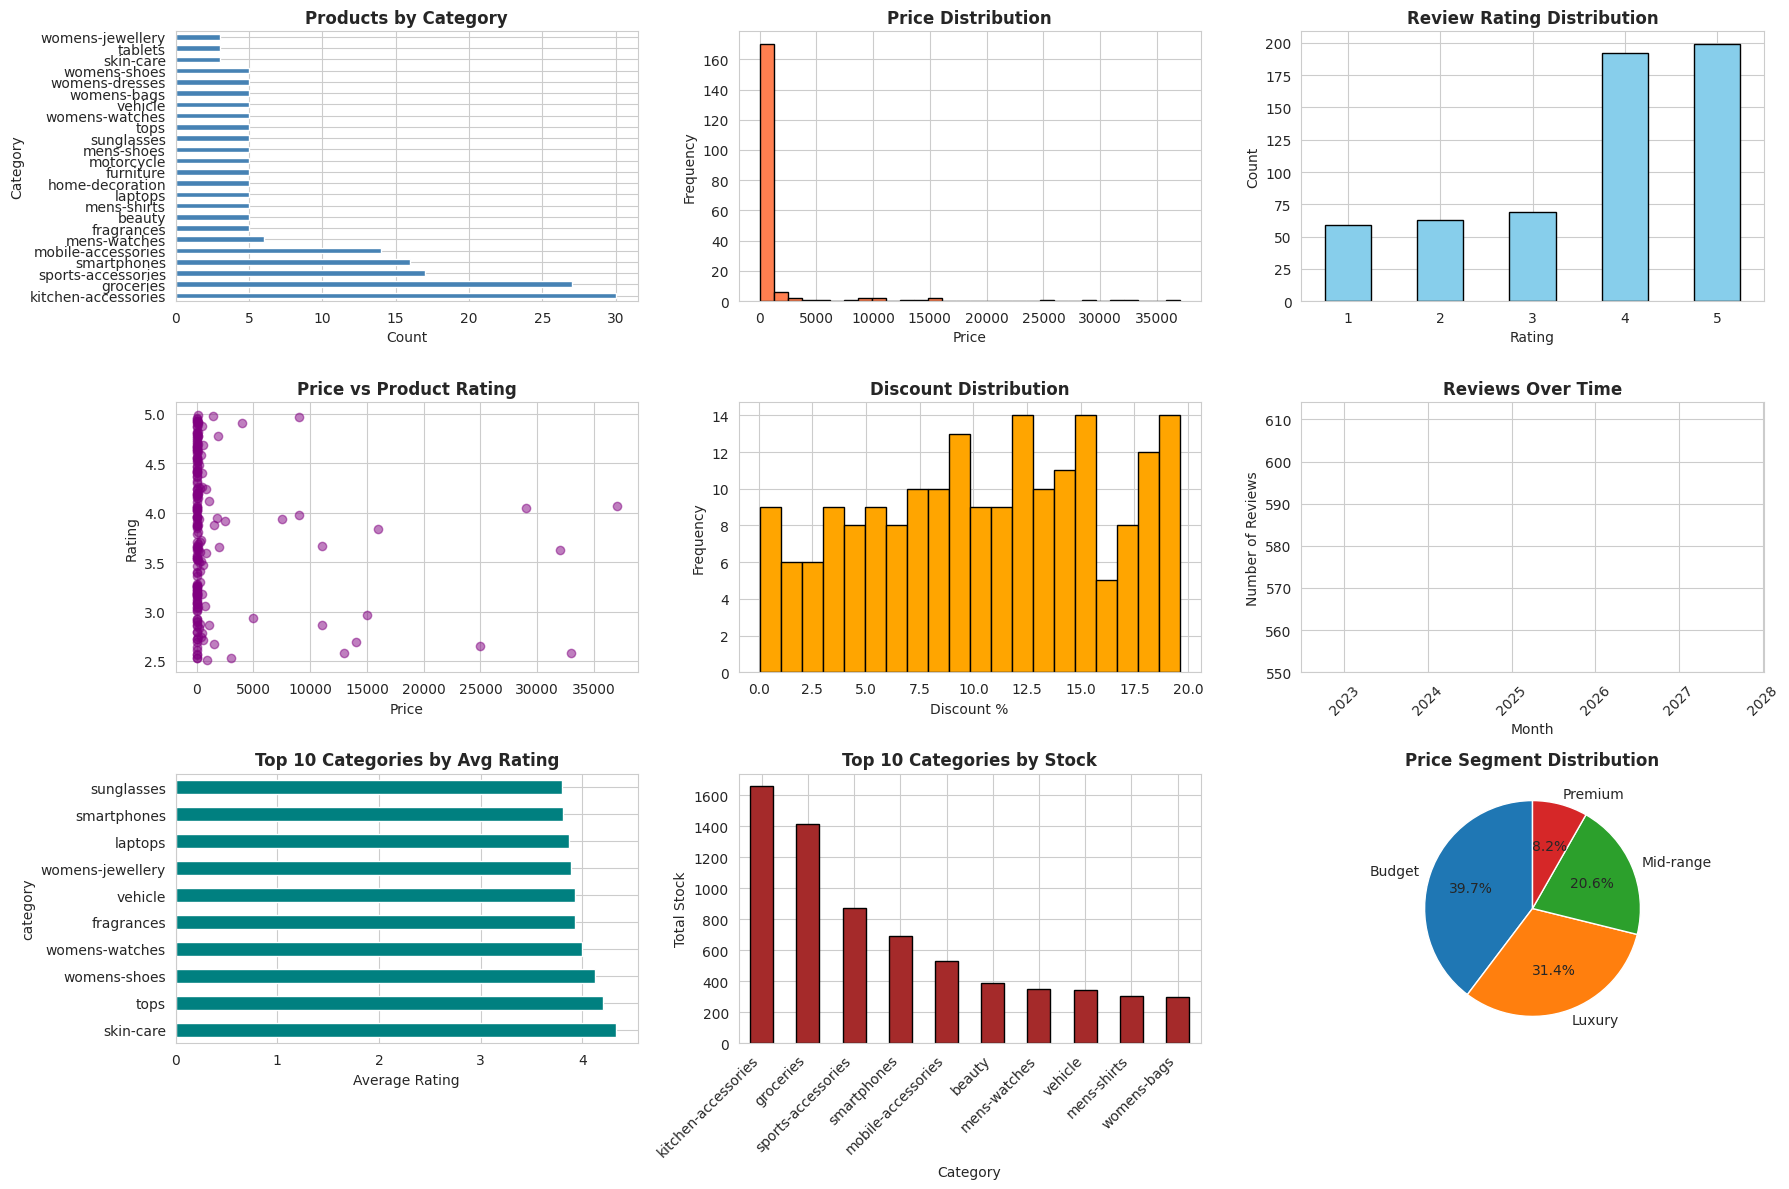

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style
sns.set_style("whitegrid")
fig = plt.figure(figsize=(18, 12))

# 1. Category distribution
plt.subplot(3, 3, 1)
category_dist.plot(kind='barh', color='steelblue')
plt.title('Products by Category', fontsize=12, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Category')

# 2. Price distribution
plt.subplot(3, 3, 2)
plt.hist(df_products['price'], bins=30, edgecolor='black', color='coral')
plt.title('Price Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Price')
plt.ylabel('Frequency')

# 3. Rating distribution (reviews)
plt.subplot(3, 3, 3)
rating_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Review Rating Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 4. Price vs Rating scatter
plt.subplot(3, 3, 4)
plt.scatter(df_products['price'], df_products['rating'], alpha=0.5, color='purple')
plt.title('Price vs Product Rating', fontsize=12, fontweight='bold')
plt.xlabel('Price')
plt.ylabel('Rating')

# 5. Discount percentage distribution
plt.subplot(3, 3, 5)
plt.hist(df_products['discountPercentage'], bins=20, edgecolor='black', color='orange')
plt.title('Discount Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Discount %')
plt.ylabel('Frequency')

# 6. Reviews over time
plt.subplot(3, 3, 6)
reviews_over_time.plot(color='green', linewidth=2)
plt.title('Reviews Over Time', fontsize=12, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)

# 7. Top 10 categories by average rating
plt.subplot(3, 3, 7)
category_performance['avg_review_rating'].head(10).plot(kind='barh', color='teal')
plt.title('Top 10 Categories by Avg Rating', fontsize=12, fontweight='bold')
plt.xlabel('Average Rating')

# 8. Stock levels by category
plt.subplot(3, 3, 8)
stock_by_category = df_products.groupby('category')['stock'].sum().sort_values(ascending=False).head(10)
stock_by_category.plot(kind='bar', color='brown', edgecolor='black')
plt.title('Top 10 Categories by Stock', fontsize=12, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Total Stock')
plt.xticks(rotation=45, ha='right')

# 9. Price segment distribution
plt.subplot(3, 3, 9)
df_products['price_segment'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Price Segment Distribution', fontsize=12, fontweight='bold')
plt.ylabel('')

plt.tight_layout()
plt.show()

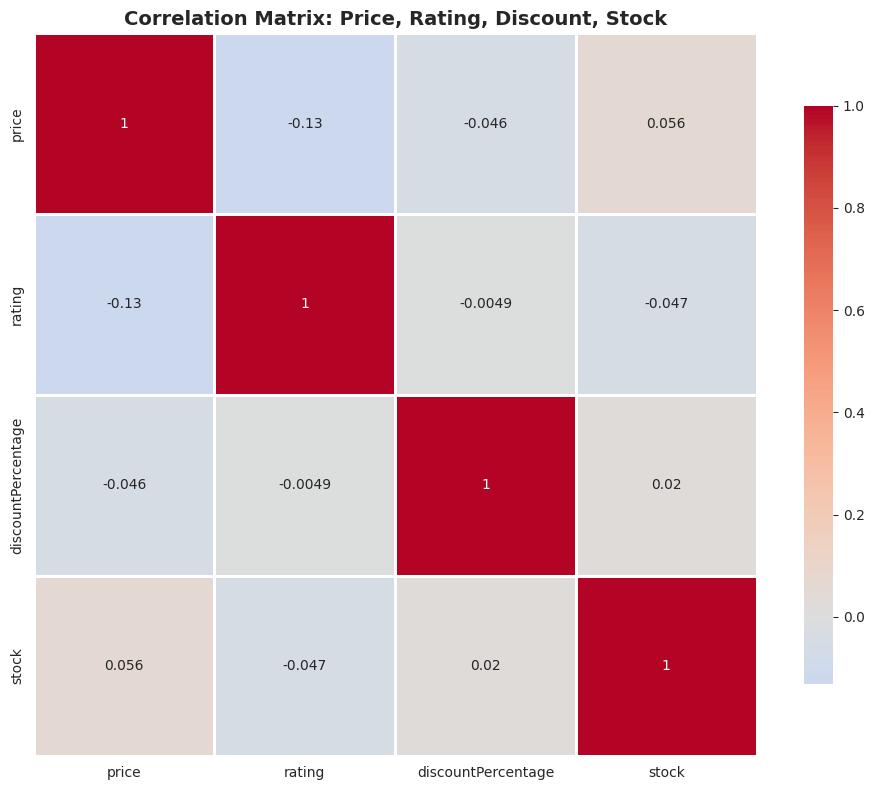

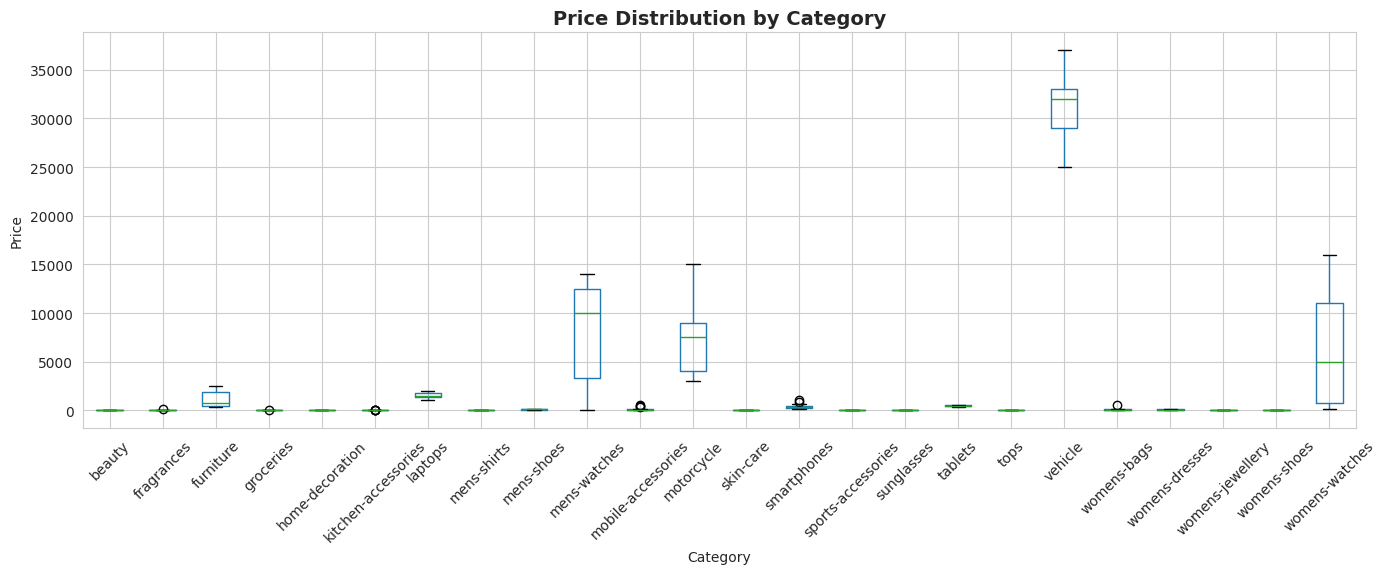

/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


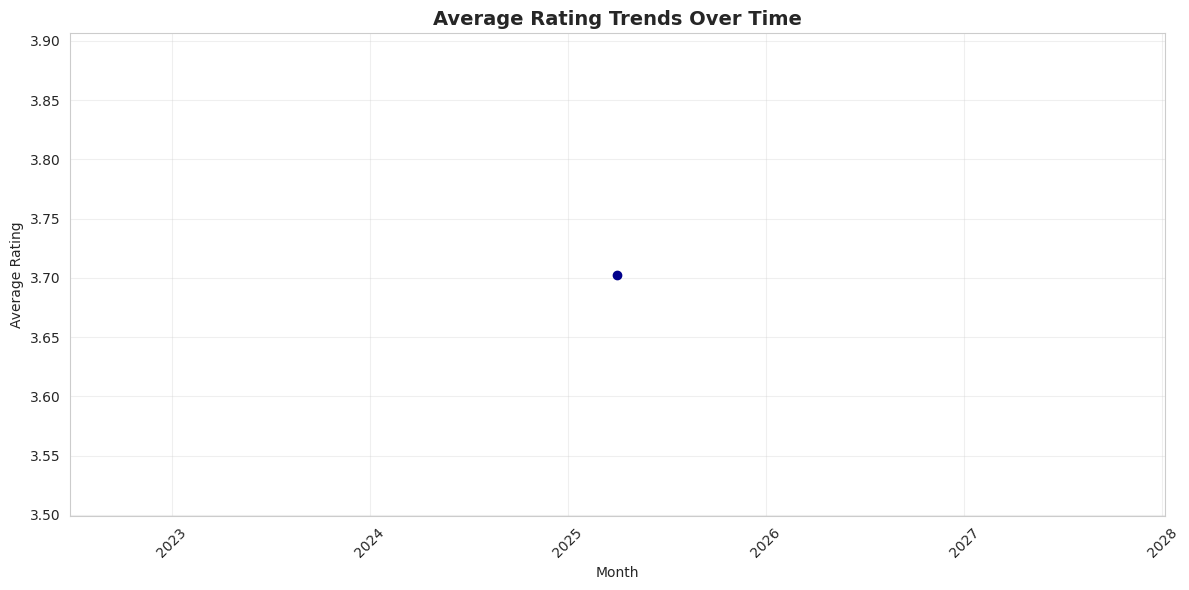

In [56]:
# Correlation heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(price_rating_corr, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: Price, Rating, Discount, Stock', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Box plot: Price by Category
fig, ax = plt.subplots(figsize=(14, 6))
df_products.boxplot(column='price', by='category', ax=ax, rot=45)
plt.title('Price Distribution by Category', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove default title
plt.xlabel('Category')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# Rating trends over time
fig, ax = plt.subplots(figsize=(12, 6))
rating_trends.plot(kind='line', marker='o', color='darkblue', linewidth=2, markersize=6)
plt.title('Average Rating Trends Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [57]:
# Calculate key metrics
total_inventory_value = (df_products['price'] * df_products['stock']).sum()
avg_discount = df_products['discountPercentage'].mean()
products_needing_restock = len(df_products[df_products['stock'] < 10])
avg_rating_diff = rating_comparison['rating_difference'].abs().mean()
total_reviews = len(df_reviews)
total_products = len(df_products)
products_with_reviews = df_reviews['product_id'].nunique()
products_without_reviews = total_products - products_with_reviews

# Calculate review sentiment
negative_review_pct = (df_reviews['negative_sentiment'].sum() / len(df_reviews)) * 100

print(f"""
{'='*60}
KEY BUSINESS METRICS
{'='*60}

INVENTORY & PRICING:
  • Total Inventory Value: ${total_inventory_value:,.2f}
  • Average Discount: {avg_discount:.2f}%
  • Products Needing Restock (< 10): {products_needing_restock}
  • Average Product Price: ${df_products['price'].mean():.2f}
  • Price Range: ${df_products['price'].min():.2f} - ${df_products['price'].max():.2f}

PRODUCT PERFORMANCE:
  • Total Products: {total_products}
  • Average Product Rating: {df_products['rating'].mean():.2f}
  • Products with Reviews: {products_with_reviews}
  • Products without Reviews: {products_without_reviews}

REVIEW INSIGHTS:
  • Total Reviews: {total_reviews}
  • Average Reviews per Product: {total_reviews/total_products:.2f}
  • Average Review Rating: {df_reviews['rating'].mean():.2f}
  • Negative Sentiment Rate: {negative_review_pct:.2f}%
  • Average Rating Difference (Product vs Review): {avg_rating_diff:.2f}

CATEGORY INSIGHTS:
  • Total Categories: {df_products['category'].nunique()}
  • Most Popular Category: {category_dist.index[0]} ({category_dist.iloc[0]} products)
  • Total Brands: {df_products['brand'].nunique()}

{'='*60}
""")


KEY BUSINESS METRICS

INVENTORY & PRICING:
  • Total Inventory Value: $17,172,492.31
  • Average Discount: 10.56%
  • Products Needing Restock (< 10): 25
  • Average Product Price: $1570.10
  • Price Range: $0.79 - $36999.99

PRODUCT PERFORMANCE:
  • Total Products: 194
  • Average Product Rating: 3.80
  • Products with Reviews: 194
  • Products without Reviews: 0

REVIEW INSIGHTS:
  • Total Reviews: 582
  • Average Reviews per Product: 3.00
  • Average Review Rating: 3.70
  • Negative Sentiment Rate: 23.88%
  • Average Rating Difference (Product vs Review): 0.86

CATEGORY INSIGHTS:
  • Total Categories: 24
  • Most Popular Category: kitchen-accessories (30 products)
  • Total Brands: 63




In [58]:
# First, ensure sentiment analysis is done on df_reviews
negative_words = ['not', 'bad', 'poor', 'terrible', 'awful', 'worst', 'disappointing', 'waste', 'useless']
df_reviews['negative_sentiment'] = df_reviews['comment'].str.lower().apply(
    lambda x: any(word in str(x) for word in negative_words)
)

# Then recreate the merged dataframe with the sentiment column
merged_df = df_reviews.merge(df_products, left_on='product_id', right_on='id', how='left')

# Now run the insights report
print(f"""
{'='*60}
ACTIONABLE INSIGHTS & RECOMMENDATIONS
{'='*60}

1. INVENTORY MANAGEMENT:
""")

# Low stock alerts
low_stock_products = df_products[df_products['stock'] < 10][['title', 'stock', 'category', 'price']].sort_values('stock')
print(f"   • {len(low_stock_products)} products critically low on stock")
if len(low_stock_products) > 0:
    print("   Top 5 products needing immediate restock:")
    for idx, row in low_stock_products.head().iterrows():
        print(f"     - {row['title']}: {row['stock']} units (${row['price']})")

print(f"""
2. PRICING STRATEGY:
""")

# Overpriced products (high price, low rating)
overpriced = df_products[(df_products['price'] > df_products['price'].quantile(0.75)) &
                          (df_products['rating'] < 3)][['title', 'price', 'rating', 'stock']]
print(f"   • {len(overpriced)} high-priced products with low ratings")

# Show top 5 overpriced products
if len(overpriced) > 0:
    print("   Top 5 overpriced products:")
    for idx, row in overpriced.head().iterrows():
        print(f"     - {row['title']}: ${row['price']} (rating: {row['rating']:.2f})")

# Discount opportunities
high_stock_low_sales = df_products[df_products['stock'] > df_products['stock'].quantile(0.75)][['title', 'stock', 'discountPercentage', 'price']].sort_values('stock', ascending=False)
print(f"   • {len(high_stock_low_sales)} products with high stock (consider promotional discounts)")

# Show top 5 high stock products
if len(high_stock_low_sales) > 0:
    print("   Top 5 products with highest stock:")
    for idx, row in high_stock_low_sales.head().iterrows():
        print(f"     - {row['title']}: {row['stock']} units (current discount: {row['discountPercentage']:.1f}%)")

print(f"""
3. CUSTOMER SATISFACTION:
""")

# Products with discrepancy between product rating and review rating
problematic_ratings = rating_comparison[rating_comparison['rating_difference'].abs() > 1]
print(f"   • {len(problematic_ratings)} products with significant rating discrepancies (>1 point)")

# Show top 5 products with biggest discrepancies
if len(problematic_ratings) > 0:
    print("   Top 5 products with largest rating discrepancies:")
    top_discrepancies = problematic_ratings.nlargest(5, 'rating_difference', keep='all')
    for prod_id, row in top_discrepancies.iterrows():
        product_title = df_products[df_products['id'] == prod_id]['title'].values[0]
        print(f"     - {product_title}: Product={row['product_rating']:.2f}, Reviews={row['avg_review_rating']:.2f} (diff: {row['rating_difference']:.2f})")

# Negative sentiment products
negative_products = merged_df[merged_df['negative_sentiment'] == True].groupby('title').size().sort_values(ascending=False).head(5)
print(f"   • Products with most negative reviews:")
if len(negative_products) > 0:
    for product, count in negative_products.items():
        print(f"     - {product}: {count} negative reviews")
else:
    print("     - No products with negative sentiment detected")

print(f"""
4. CATEGORY PERFORMANCE:
""")

# Best and worst performing categories
best_category = category_performance.index[0]
worst_category = category_performance.index[-1]
print(f"   • Best performing: {best_category} (avg rating: {category_performance.loc[best_category, 'avg_review_rating']:.2f})")
print(f"   • Needs improvement: {worst_category} (avg rating: {category_performance.loc[worst_category, 'avg_review_rating']:.2f})")

# Show all categories ranked by performance
print("\n   All categories ranked by average review rating:")
for idx, (cat, rating) in enumerate(category_performance['avg_review_rating'].sort_values(ascending=False).items(), 1):
    review_count = category_performance.loc[cat, 'review_count']
    print(f"     {idx}. {cat}: {rating:.2f} ({int(review_count)} reviews)")

print(f"""
{'='*60}
""")


ACTIONABLE INSIGHTS & RECOMMENDATIONS

1. INVENTORY MANAGEMENT:

   • 25 products critically low on stock
   Top 5 products needing immediate restock:
     - Sportbike Motorcycle: 0 units ($7499.99)
     - Samsung Galaxy S8: 0 units ($499.99)
     - Watch Gold for Women: 0 units ($799.99)
     - Volleyball: 0 units ($11.99)
     - Classic Sun Glasses: 1 units ($24.99)

2. PRICING STRATEGY:

   • 15 high-priced products with low ratings
   Top 5 overpriced products:
     - Bedside Table African Cherry: $299.99 (rating: 2.87)
     - Lenovo Yoga 920: $1099.99 (rating: 2.86)
     - New DELL XPS 13 9300 Laptop: $1499.99 (rating: 2.67)
     - Rolex Cellini Moonphase: $12999.99 (rating: 2.58)
     - Rolex Submariner Watch: $13999.99 (rating: 2.69)
   • 48 products with high stock (consider promotional discounts)
   Top 5 products with highest stock:
     - Baseball Ball: 100 units (current discount: 1.7%)
     - Longines Master Collection: 100 units (current discount: 17.2%)
     - Essence M

/tmp/ipython-input-3823522498.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_data = df_products.groupby(['category', 'price_segment'])['rating'].mean().unstack(fill_value=0)
/tmp/ipython-input-3823522498.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top_cat, y='category', x='price', palette='Set2', ax=ax2)
/tmp/ipython-input-3823522498.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_discount, y='category', x='discountPercentage', palette='coolwarm', ax=ax5)
/

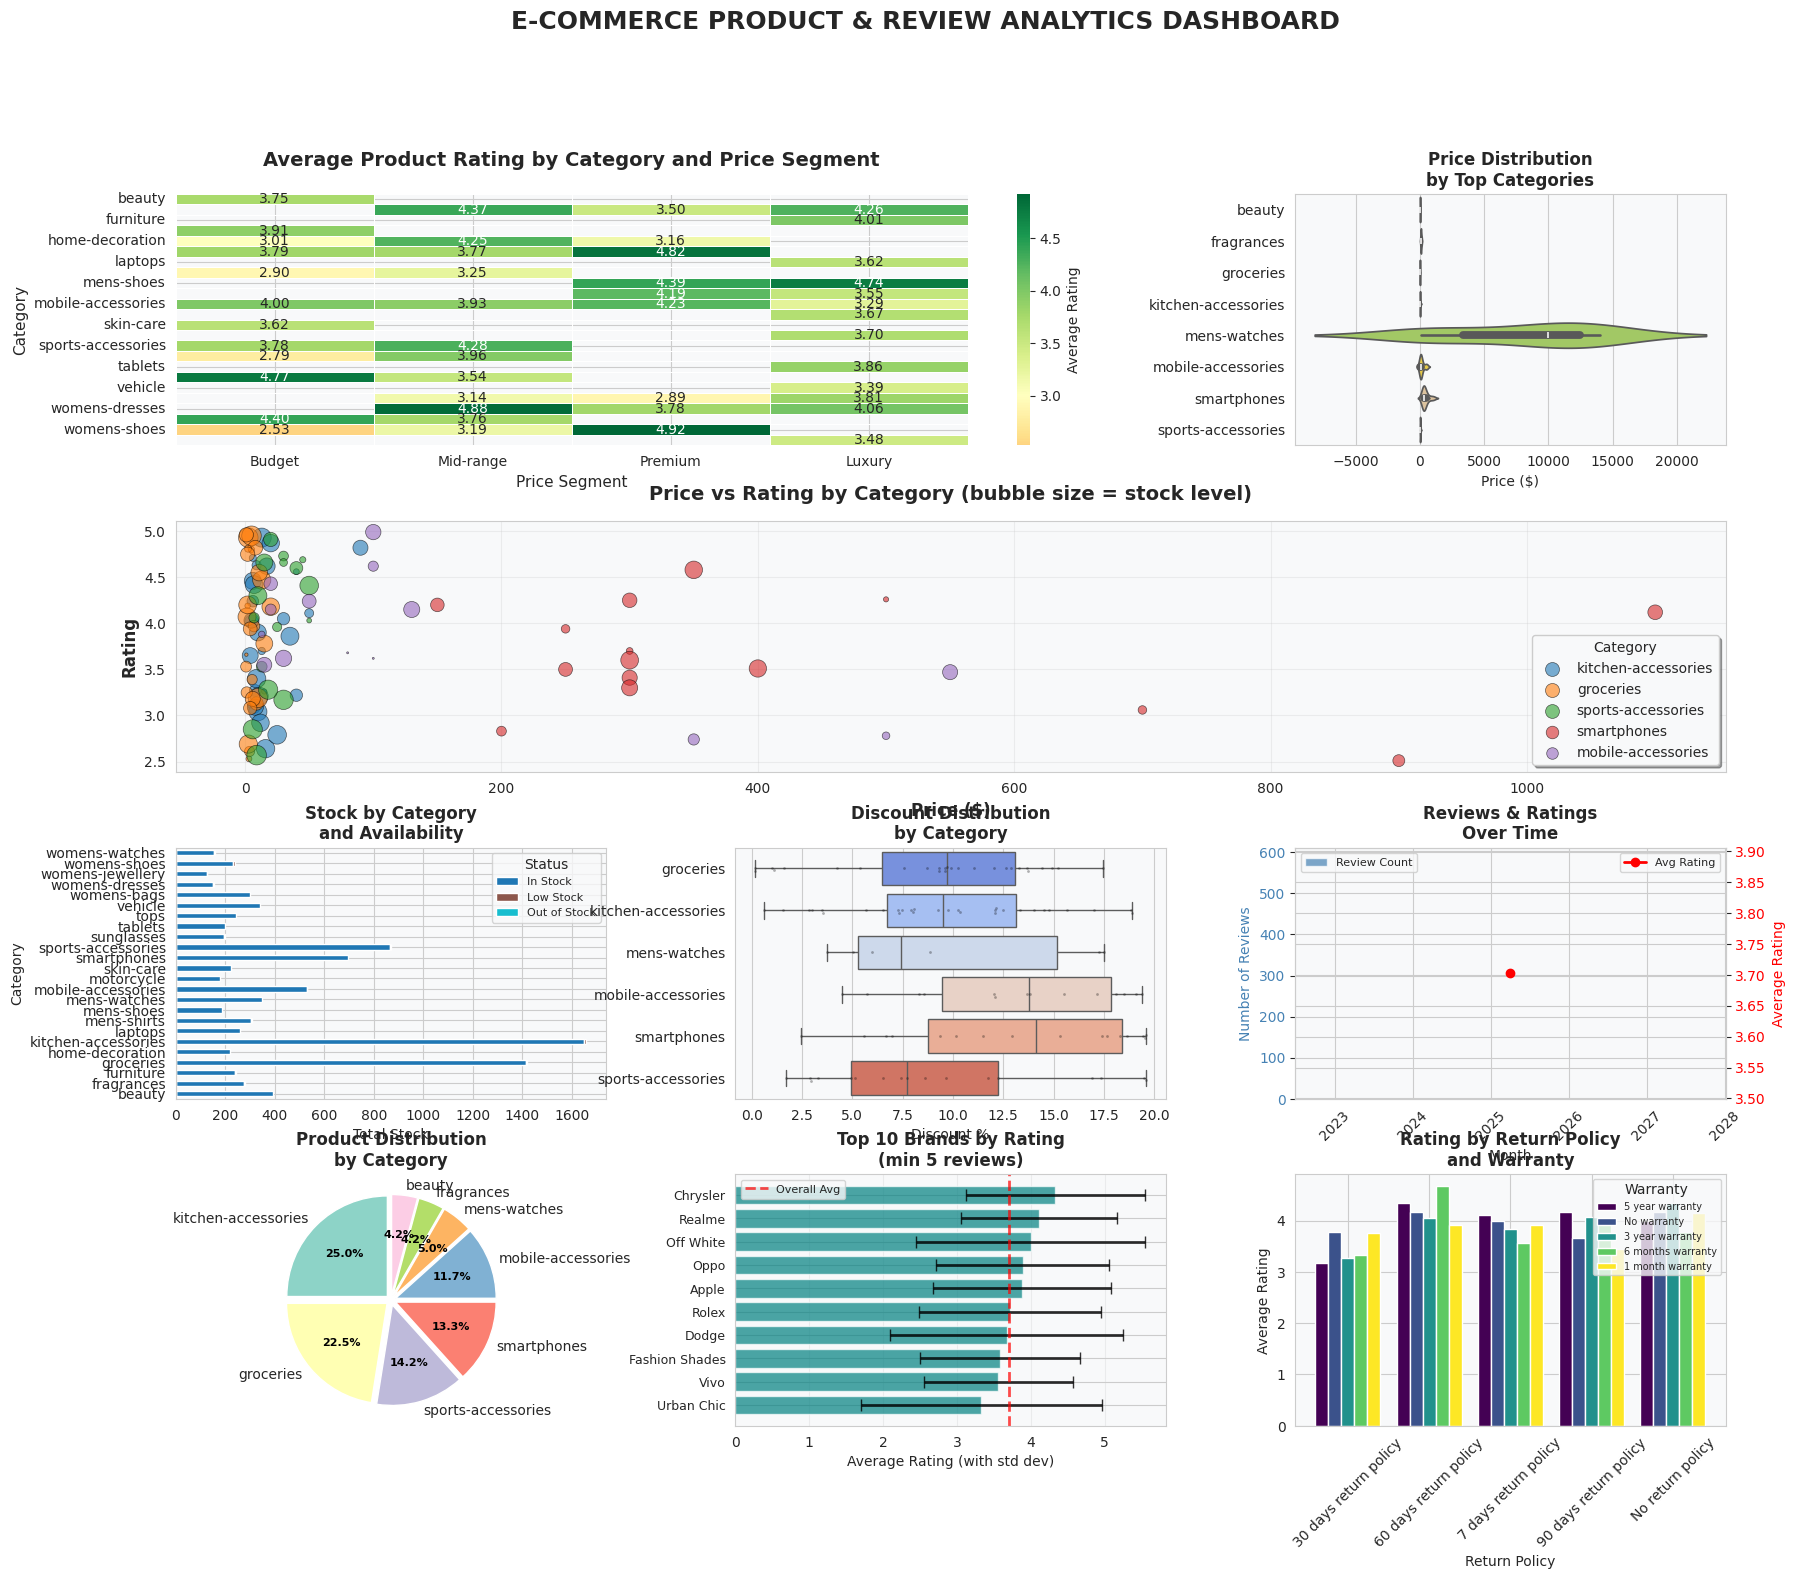

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = '#f8f9fa'

# Create complex dashboard
fig = plt.figure(figsize=(20, 16))
gs = GridSpec(4, 3, figure=fig, hspace=0.3, wspace=0.3)

# 1. Heatmap: Average Rating by Category and Price Segment
ax1 = fig.add_subplot(gs[0, :2])
df_products['price_segment'] = pd.cut(
    df_products['price'],
    bins=[0, 20, 50, 100, float('inf')],
    labels=['Budget', 'Mid-range', 'Premium', 'Luxury']
)
pivot_data = df_products.groupby(['category', 'price_segment'])['rating'].mean().unstack(fill_value=0)
sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='RdYlGn', center=3,
            linewidths=0.5, cbar_kws={'label': 'Average Rating'}, ax=ax1)
ax1.set_title('Average Product Rating by Category and Price Segment', fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Price Segment', fontsize=11)
ax1.set_ylabel('Category', fontsize=11)

# 2. Violin Plot: Price Distribution by Top Categories
ax2 = fig.add_subplot(gs[0, 2])
top_categories = df_products['category'].value_counts().head(8).index
df_top_cat = df_products[df_products['category'].isin(top_categories)]
sns.violinplot(data=df_top_cat, y='category', x='price', palette='Set2', ax=ax2)
ax2.set_title('Price Distribution\nby Top Categories', fontsize=12, fontweight='bold')
ax2.set_xlabel('Price ($)', fontsize=10)
ax2.set_ylabel('')

# 3. Scatter with Regression: Price vs Rating with Category Colors
ax3 = fig.add_subplot(gs[1, :])
top_5_categories = df_products['category'].value_counts().head(5).index
df_top5 = df_products[df_products['category'].isin(top_5_categories)]
for category in top_5_categories:
    cat_data = df_top5[df_top5['category'] == category]
    ax3.scatter(cat_data['price'], cat_data['rating'],
               s=cat_data['stock']*2, alpha=0.6, label=category, edgecolors='black', linewidth=0.5)
ax3.set_xlabel('Price ($)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Rating', fontsize=12, fontweight='bold')
ax3.set_title('Price vs Rating by Category (bubble size = stock level)', fontsize=14, fontweight='bold', pad=15)
ax3.legend(title='Category', loc='best', frameon=True, shadow=True)
ax3.grid(True, alpha=0.3)

# 4. Stacked Bar: Stock Distribution by Category and Availability
ax4 = fig.add_subplot(gs[2, 0])
stock_availability = df_products.groupby(['category', 'availabilityStatus'])['stock'].sum().unstack(fill_value=0)
stock_availability.plot(kind='barh', stacked=True, ax=ax4, colormap='tab10')
ax4.set_title('Stock by Category\nand Availability', fontsize=12, fontweight='bold')
ax4.set_xlabel('Total Stock', fontsize=10)
ax4.set_ylabel('Category', fontsize=10)
ax4.legend(title='Status', loc='best', fontsize=8)

# 5. Box Plot with Swarm: Discount Percentage by Category
ax5 = fig.add_subplot(gs[2, 1])
top_cats_for_discount = df_products['category'].value_counts().head(6).index
df_discount = df_products[df_products['category'].isin(top_cats_for_discount)]
sns.boxplot(data=df_discount, y='category', x='discountPercentage', palette='coolwarm', ax=ax5)
sns.swarmplot(data=df_discount, y='category', x='discountPercentage',
              color='black', alpha=0.3, size=2, ax=ax5)
ax5.set_title('Discount Distribution\nby Category', fontsize=12, fontweight='bold')
ax5.set_xlabel('Discount %', fontsize=10)
ax5.set_ylabel('')

# 6. Dual Axis: Reviews Over Time with Average Rating
ax6 = fig.add_subplot(gs[2, 2])
ax6_twin = ax6.twinx()
reviews_over_time = df_reviews.groupby('year_month').size()
rating_over_time = df_reviews.groupby('year_month')['rating'].mean()
reviews_over_time.plot(kind='bar', ax=ax6, color='steelblue', alpha=0.7, label='Review Count')
rating_over_time.plot(ax=ax6_twin, color='red', marker='o', linewidth=2, label='Avg Rating')
ax6.set_title('Reviews & Ratings\nOver Time', fontsize=12, fontweight='bold')
ax6.set_xlabel('Month', fontsize=10)
ax6.set_ylabel('Number of Reviews', fontsize=10, color='steelblue')
ax6_twin.set_ylabel('Average Rating', fontsize=10, color='red')
ax6.tick_params(axis='y', labelcolor='steelblue')
ax6_twin.tick_params(axis='y', labelcolor='red')
ax6.legend(loc='upper left', fontsize=8)
ax6_twin.legend(loc='upper right', fontsize=8)
ax6.tick_params(axis='x', rotation=45)

# 7. Sunburst-style Pie Charts: Category breakdown
ax7 = fig.add_subplot(gs[3, 0])
category_counts = df_products['category'].value_counts().head(8)
colors = plt.cm.Set3(range(len(category_counts)))
wedges, texts, autotexts = ax7.pie(category_counts, labels=category_counts.index,
                                     autopct='%1.1f%%', startangle=90, colors=colors,
                                     explode=[0.05]*len(category_counts))
ax7.set_title('Product Distribution\nby Category', fontsize=12, fontweight='bold')
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(8)
    autotext.set_weight('bold')

# 8. Horizontal Bar with Error Bars: Brand Performance
ax8 = fig.add_subplot(gs[3, 1])
brand_stats = merged_df.groupby('brand').agg({
    'rating_x': ['mean', 'std', 'count']
}).round(2)
brand_stats.columns = ['mean_rating', 'std_rating', 'count']
brand_stats = brand_stats[brand_stats['count'] >= 5].sort_values('mean_rating', ascending=True).tail(10)
ax8.barh(range(len(brand_stats)), brand_stats['mean_rating'],
         xerr=brand_stats['std_rating'], color='teal', alpha=0.7,
         error_kw={'elinewidth': 2, 'capsize': 4, 'alpha': 0.8})
ax8.set_yticks(range(len(brand_stats)))
ax8.set_yticklabels(brand_stats.index, fontsize=9)
ax8.set_xlabel('Average Rating (with std dev)', fontsize=10)
ax8.set_title('Top 10 Brands by Rating\n(min 5 reviews)', fontsize=12, fontweight='bold')
ax8.axvline(x=df_reviews['rating'].mean(), color='red', linestyle='--', linewidth=2, alpha=0.7, label='Overall Avg')
ax8.legend(fontsize=8)
ax8.grid(axis='x', alpha=0.3)

# 9. Clustered Bar: Return Policy vs Warranty Impact
ax9 = fig.add_subplot(gs[3, 2])
policy_warranty = merged_df.groupby(['returnPolicy', 'warrantyInformation'])['rating_x'].mean().unstack().fillna(0)
policy_warranty_top = policy_warranty.loc[:, policy_warranty.mean().nlargest(5).index]
policy_warranty_top.plot(kind='bar', ax=ax9, colormap='viridis', width=0.8)
ax9.set_title('Rating by Return Policy\nand Warranty', fontsize=12, fontweight='bold')
ax9.set_xlabel('Return Policy', fontsize=10)
ax9.set_ylabel('Average Rating', fontsize=10)
ax9.legend(title='Warranty', fontsize=7, loc='best')
ax9.tick_params(axis='x', rotation=45)

plt.suptitle('E-COMMERCE PRODUCT & REVIEW ANALYTICS DASHBOARD',
             fontsize=18, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()

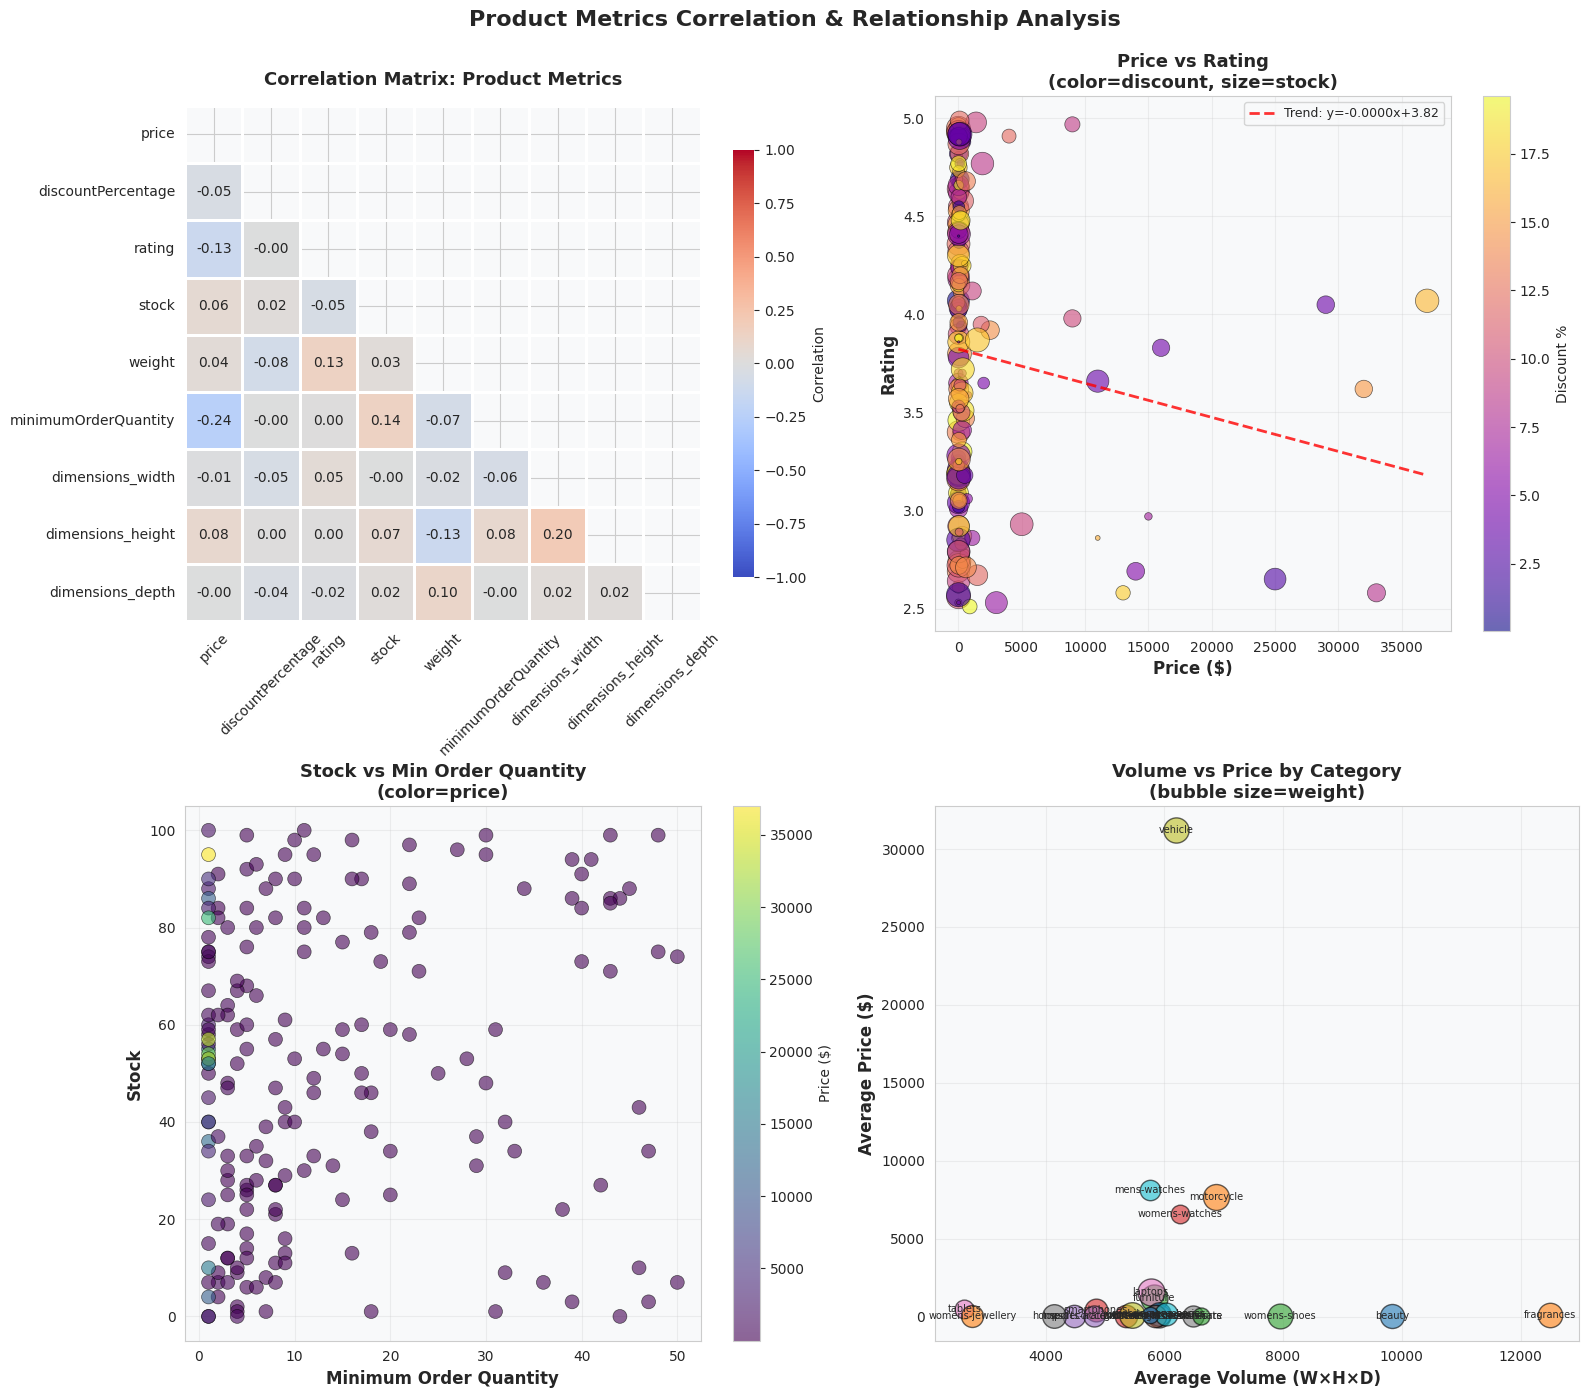

In [60]:
# Create comprehensive correlation analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle('Product Metrics Correlation & Relationship Analysis',
             fontsize=16, fontweight='bold', y=0.995)

# Prepare data
numeric_cols = ['price', 'discountPercentage', 'rating', 'stock',
                'weight', 'minimumOrderQuantity', 'dimensions_width',
                'dimensions_height', 'dimensions_depth']
correlation_data = df_products[numeric_cols].corr()

# 1. Full Correlation Heatmap with annotations
ax1 = axes[0, 0]
mask = np.triu(np.ones_like(correlation_data, dtype=bool))
sns.heatmap(correlation_data, mask=mask, annot=True, fmt='.2f',
            cmap='coolwarm', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8, "label": "Correlation"}, ax=ax1,
            vmin=-1, vmax=1)
ax1.set_title('Correlation Matrix: Product Metrics', fontsize=13, fontweight='bold', pad=15)
ax1.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='y', rotation=0)

# 2. Price vs Rating with Discount as color gradient
ax2 = axes[0, 1]
scatter = ax2.scatter(df_products['price'], df_products['rating'],
                     c=df_products['discountPercentage'], s=df_products['stock']*3,
                     cmap='plasma', alpha=0.6, edgecolors='black', linewidth=0.5)
ax2.set_xlabel('Price ($)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Rating', fontsize=12, fontweight='bold')
ax2.set_title('Price vs Rating\n(color=discount, size=stock)', fontsize=13, fontweight='bold')
cbar = plt.colorbar(scatter, ax=ax2)
cbar.set_label('Discount %', fontsize=10)
ax2.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df_products['price'], df_products['rating'], 1)
p = np.poly1d(z)
ax2.plot(df_products['price'].sort_values(), p(df_products['price'].sort_values()),
         "r--", alpha=0.8, linewidth=2, label=f'Trend: y={z[0]:.4f}x+{z[1]:.2f}')
ax2.legend(fontsize=9)

# 3. Stock vs Minimum Order Quantity
ax3 = axes[1, 0]
scatter2 = ax3.scatter(df_products['minimumOrderQuantity'], df_products['stock'],
                      c=df_products['price'], s=100, cmap='viridis',
                      alpha=0.6, edgecolors='black', linewidth=0.5)
ax3.set_xlabel('Minimum Order Quantity', fontsize=12, fontweight='bold')
ax3.set_ylabel('Stock', fontsize=12, fontweight='bold')
ax3.set_title('Stock vs Min Order Quantity\n(color=price)', fontsize=13, fontweight='bold')
cbar2 = plt.colorbar(scatter2, ax=ax3)
cbar2.set_label('Price ($)', fontsize=10)
ax3.grid(True, alpha=0.3)

# 4. Dimensions Analysis (3D-like representation)
ax4 = axes[1, 1]
# Calculate volume
df_products['volume'] = (df_products['dimensions_width'] *
                         df_products['dimensions_height'] *
                         df_products['dimensions_depth'])
volume_price_by_cat = df_products.groupby('category').agg({
    'volume': 'mean',
    'price': 'mean',
    'weight': 'mean'
}).round(2)

# Create bubble chart
for idx, row in volume_price_by_cat.iterrows():
    ax4.scatter(row['volume'], row['price'], s=row['weight']*50,
               alpha=0.6, edgecolors='black', linewidth=1)
    ax4.annotate(idx, (row['volume'], row['price']),
                fontsize=7, ha='center', va='center')

ax4.set_xlabel('Average Volume (W×H×D)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Average Price ($)', fontsize=12, fontweight='bold')
ax4.set_title('Volume vs Price by Category\n(bubble size=weight)', fontsize=13, fontweight='bold')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

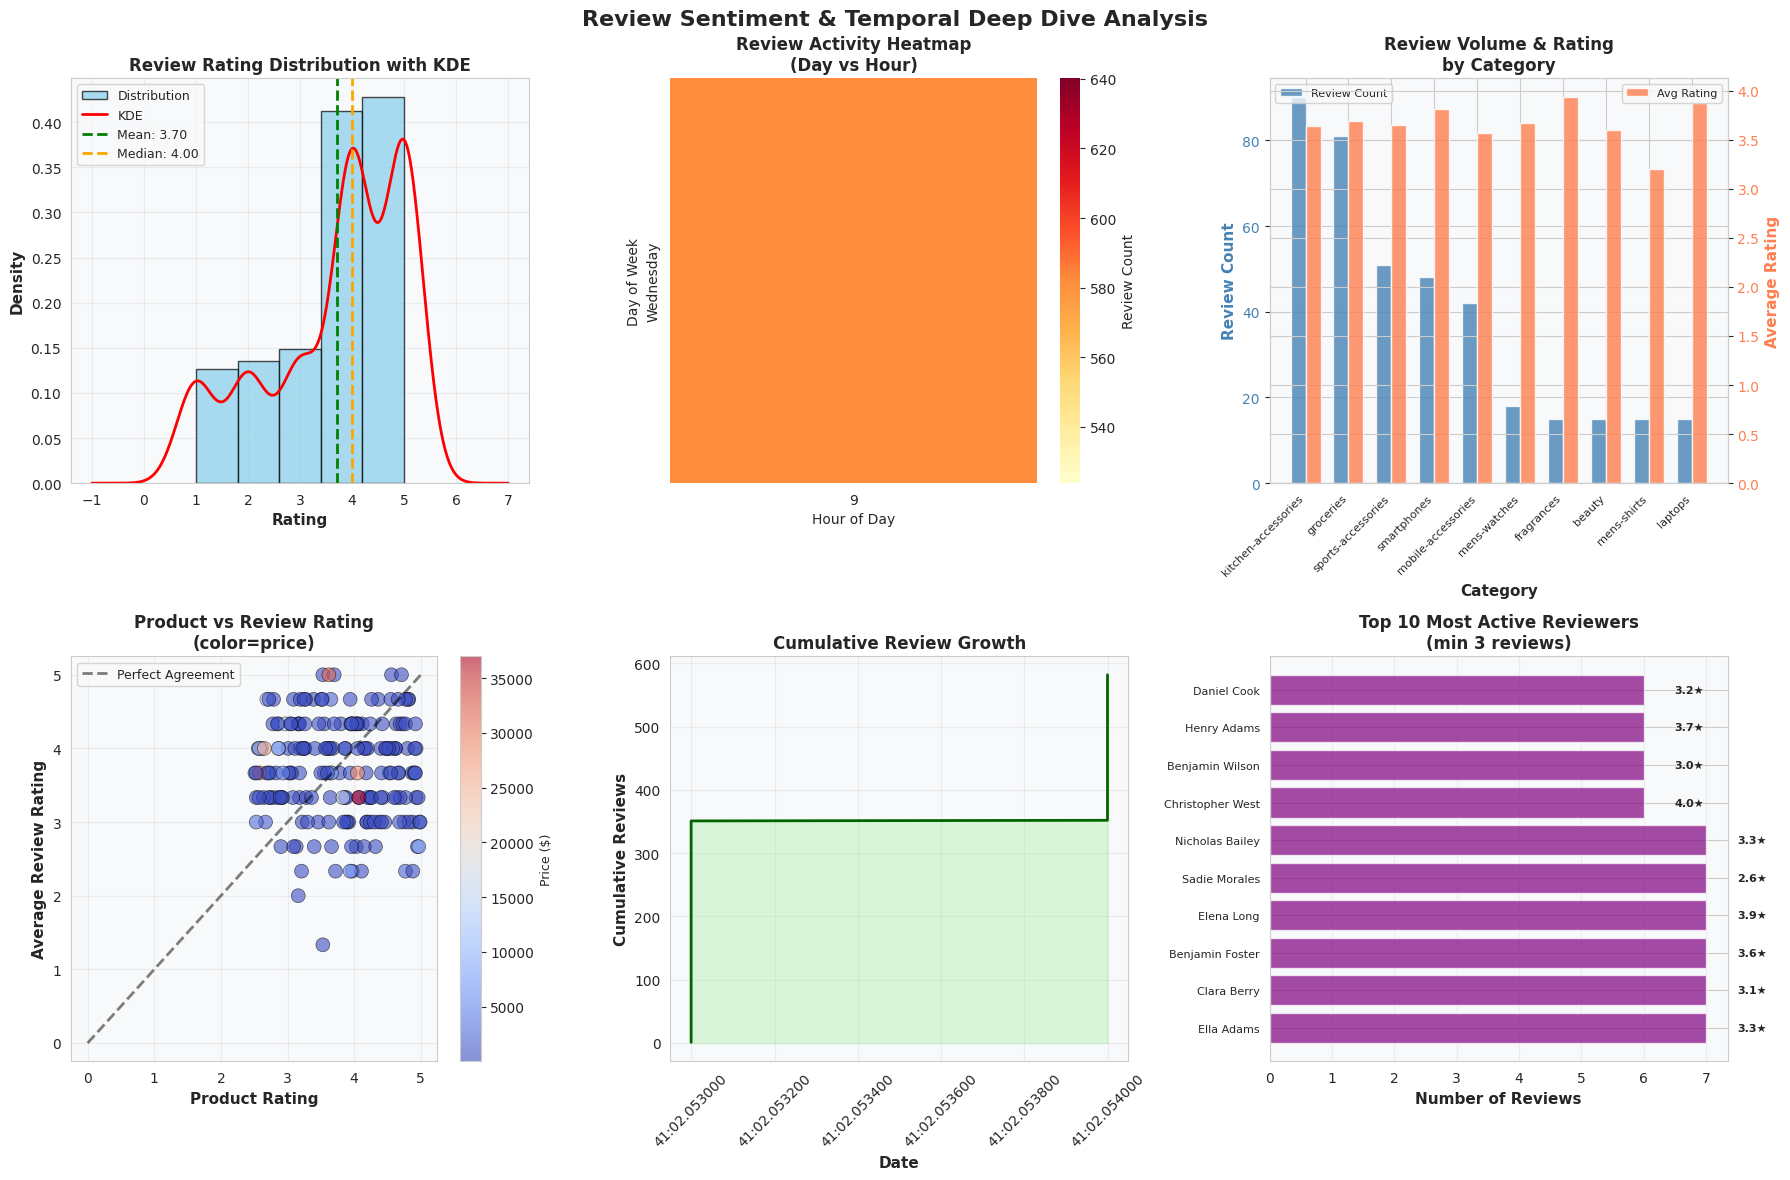

In [61]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Review Sentiment & Temporal Deep Dive Analysis',
             fontsize=16, fontweight='bold')

# 1. Rating Distribution with KDE
ax1 = axes[0, 0]
ax1.hist(df_reviews['rating'], bins=5, alpha=0.7, color='skyblue',
         edgecolor='black', density=True, label='Distribution')
df_reviews['rating'].plot(kind='kde', ax=ax1, color='red', linewidth=2, label='KDE')
ax1.axvline(df_reviews['rating'].mean(), color='green', linestyle='--',
           linewidth=2, label=f'Mean: {df_reviews["rating"].mean():.2f}')
ax1.axvline(df_reviews['rating'].median(), color='orange', linestyle='--',
           linewidth=2, label=f'Median: {df_reviews["rating"].median():.2f}')
ax1.set_xlabel('Rating', fontsize=11, fontweight='bold')
ax1.set_ylabel('Density', fontsize=11, fontweight='bold')
ax1.set_title('Review Rating Distribution with KDE', fontsize=12, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# 2. Heatmap: Day of Week vs Hour (if we extract it)
ax2 = axes[0, 1]
df_reviews['day_of_week'] = df_reviews['date'].dt.day_name()
df_reviews['hour'] = df_reviews['date'].dt.hour
review_time_matrix = df_reviews.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)
# Reorder days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
review_time_matrix = review_time_matrix.reindex([d for d in day_order if d in review_time_matrix.index])
sns.heatmap(review_time_matrix, cmap='YlOrRd', annot=False, fmt='d',
           cbar_kws={'label': 'Review Count'}, ax=ax2)
ax2.set_title('Review Activity Heatmap\n(Day vs Hour)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Hour of Day', fontsize=10)
ax2.set_ylabel('Day of Week', fontsize=10)

# 3. Category-wise Review Volume and Average Rating
ax3 = axes[0, 2]
category_review_stats = merged_df.groupby('category').agg({
    'rating_x': ['mean', 'count']
}).round(2)
category_review_stats.columns = ['avg_rating', 'review_count']
category_review_stats = category_review_stats.sort_values('review_count', ascending=False).head(10)

x = np.arange(len(category_review_stats))
width = 0.35
ax3_twin = ax3.twinx()

bars1 = ax3.bar(x - width/2, category_review_stats['review_count'], width,
               label='Review Count', color='steelblue', alpha=0.8)
bars2 = ax3_twin.bar(x + width/2, category_review_stats['avg_rating'], width,
                    label='Avg Rating', color='coral', alpha=0.8)

ax3.set_xlabel('Category', fontsize=11, fontweight='bold')
ax3.set_ylabel('Review Count', fontsize=11, fontweight='bold', color='steelblue')
ax3_twin.set_ylabel('Average Rating', fontsize=11, fontweight='bold', color='coral')
ax3.set_title('Review Volume & Rating\nby Category', fontsize=12, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(category_review_stats.index, rotation=45, ha='right', fontsize=8)
ax3.tick_params(axis='y', labelcolor='steelblue')
ax3_twin.tick_params(axis='y', labelcolor='coral')
ax3.legend(loc='upper left', fontsize=8)
ax3_twin.legend(loc='upper right', fontsize=8)

# 4. Product Rating vs Average Review Rating Scatter
ax4 = axes[1, 0]
rating_comp = merged_df.groupby('product_id').agg({
    'rating_y': 'first',
    'rating_x': 'mean',
    'price': 'first'
}).dropna()

scatter3 = ax4.scatter(rating_comp['rating_y'], rating_comp['rating_x'],
                      c=rating_comp['price'], s=100, cmap='coolwarm',
                      alpha=0.6, edgecolors='black', linewidth=0.5)
ax4.plot([0, 5], [0, 5], 'k--', linewidth=2, alpha=0.5, label='Perfect Agreement')
ax4.set_xlabel('Product Rating', fontsize=11, fontweight='bold')
ax4.set_ylabel('Average Review Rating', fontsize=11, fontweight='bold')
ax4.set_title('Product vs Review Rating\n(color=price)', fontsize=12, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)
cbar3 = plt.colorbar(scatter3, ax=ax4)
cbar3.set_label('Price ($)', fontsize=9)

# 5. Cumulative Reviews Over Time
ax5 = axes[1, 1]
df_reviews_sorted = df_reviews.sort_values('date')
df_reviews_sorted['cumulative_reviews'] = range(1, len(df_reviews_sorted) + 1)
ax5.plot(df_reviews_sorted['date'], df_reviews_sorted['cumulative_reviews'],
        linewidth=2, color='darkgreen')
ax5.fill_between(df_reviews_sorted['date'], df_reviews_sorted['cumulative_reviews'],
                 alpha=0.3, color='lightgreen')
ax5.set_xlabel('Date', fontsize=11, fontweight='bold')
ax5.set_ylabel('Cumulative Reviews', fontsize=11, fontweight='bold')
ax5.set_title('Cumulative Review Growth', fontsize=12, fontweight='bold')
ax5.grid(True, alpha=0.3)
ax5.tick_params(axis='x', rotation=45)

# 6. Top Reviewers - Review Count and Average Rating
ax6 = axes[1, 2]
top_reviewers_stats = df_reviews.groupby('reviewerName').agg({
    'rating': ['count', 'mean']
}).round(2)
top_reviewers_stats.columns = ['review_count', 'avg_rating']
top_reviewers_stats = top_reviewers_stats[top_reviewers_stats['review_count'] >= 3].sort_values('review_count', ascending=False).head(10)

y_pos = np.arange(len(top_reviewers_stats))
ax6.barh(y_pos, top_reviewers_stats['review_count'], color='purple', alpha=0.7)
ax6.set_yticks(y_pos)
ax6.set_yticklabels(top_reviewers_stats.index, fontsize=8)
ax6.set_xlabel('Number of Reviews', fontsize=11, fontweight='bold')
ax6.set_title('Top 10 Most Active Reviewers\n(min 3 reviews)', fontsize=12, fontweight='bold')
ax6.grid(axis='x', alpha=0.3)

# Add rating as text
for i, (idx, row) in enumerate(top_reviewers_stats.iterrows()):
    ax6.text(row['review_count'] + 0.5, i, f"{row['avg_rating']:.1f}★",
            va='center', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

/tmp/ipython-input-3493788570.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_rating = df_products.groupby(['discount_bin', 'price_segment'])['rating'].mean().unstack()
/tmp/ipython-input-3493788570.py:73: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  optimization_matrix = df_products.groupby(['price_tercile', 'rating_tercile']).size().unstack(fill_value=0)


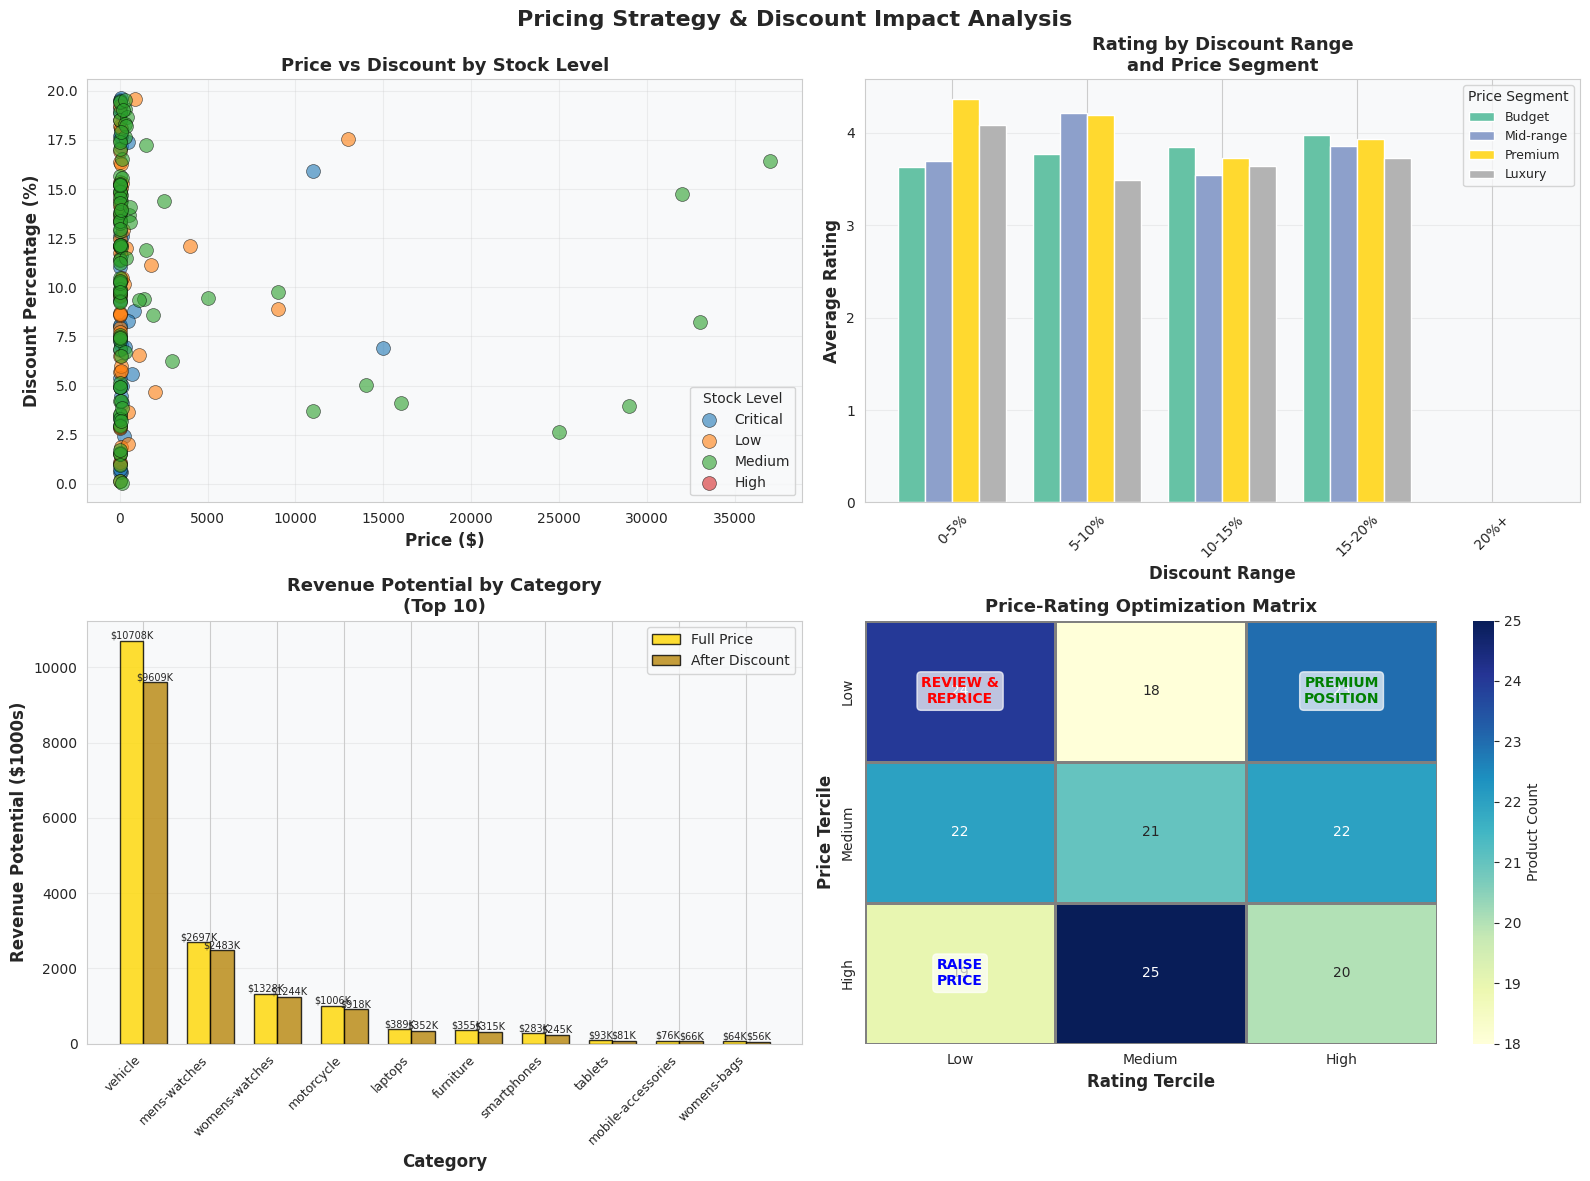

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Pricing Strategy & Discount Impact Analysis',
             fontsize=16, fontweight='bold')

# 1. Price vs Discount with Stock indicator
ax1 = axes[0, 0]
df_products['stock_level'] = pd.cut(df_products['stock'],
                                     bins=[0, 20, 50, 100, float('inf')],
                                     labels=['Critical', 'Low', 'Medium', 'High'])
for stock_level in ['Critical', 'Low', 'Medium', 'High']:
    data = df_products[df_products['stock_level'] == stock_level]
    ax1.scatter(data['price'], data['discountPercentage'],
               label=stock_level, s=100, alpha=0.6, edgecolors='black', linewidth=0.5)
ax1.set_xlabel('Price ($)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Discount Percentage (%)', fontsize=12, fontweight='bold')
ax1.set_title('Price vs Discount by Stock Level', fontsize=13, fontweight='bold')
ax1.legend(title='Stock Level', fontsize=10)
ax1.grid(True, alpha=0.3)

# 2. Discount Impact on Rating by Price Segment
ax2 = axes[0, 1]
discount_bins = pd.cut(df_products['discountPercentage'],
                      bins=[0, 5, 10, 15, 20, float('inf')],
                      labels=['0-5%', '5-10%', '10-15%', '15-20%', '20%+'])
df_products['discount_bin'] = discount_bins
discount_rating = df_products.groupby(['discount_bin', 'price_segment'])['rating'].mean().unstack()
discount_rating.plot(kind='bar', ax=ax2, colormap='Set2', width=0.8)
ax2.set_xlabel('Discount Range', fontsize=12, fontweight='bold')
ax2.set_ylabel('Average Rating', fontsize=12, fontweight='bold')
ax2.set_title('Rating by Discount Range\nand Price Segment', fontsize=13, fontweight='bold')
ax2.legend(title='Price Segment', fontsize=9)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# 3. Revenue Potential Analysis
ax3 = axes[1, 0]
df_products['potential_revenue'] = df_products['price'] * df_products['stock']
df_products['discounted_revenue'] = df_products['potential_revenue'] * (1 - df_products['discountPercentage']/100)
revenue_by_cat = df_products.groupby('category').agg({
    'potential_revenue': 'sum',
    'discounted_revenue': 'sum'
}).sort_values('potential_revenue', ascending=False).head(10) / 1000  # Convert to thousands

x = np.arange(len(revenue_by_cat))
width = 0.35
bars1 = ax3.bar(x - width/2, revenue_by_cat['potential_revenue'], width,
               label='Full Price', color='gold', alpha=0.8, edgecolor='black')
bars2 = ax3.bar(x + width/2, revenue_by_cat['discounted_revenue'], width,
               label='After Discount', color='darkgoldenrod', alpha=0.8, edgecolor='black')

ax3.set_xlabel('Category', fontsize=12, fontweight='bold')
ax3.set_ylabel('Revenue Potential ($1000s)', fontsize=12, fontweight='bold')
ax3.set_title('Revenue Potential by Category\n(Top 10)', fontsize=13, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(revenue_by_cat.index, rotation=45, ha='right', fontsize=9)
ax3.legend(fontsize=10)
ax3.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:.0f}K', ha='center', va='bottom', fontsize=7)

# 4. Price Optimization Matrix
ax4 = axes[1, 1]
# Create price-rating segments
df_products['price_tercile'] = pd.qcut(df_products['price'], q=3,
                                        labels=['Low', 'Medium', 'High'])
df_products['rating_tercile'] = pd.qcut(df_products['rating'], q=3,
                                         labels=['Low', 'Medium', 'High'])
optimization_matrix = df_products.groupby(['price_tercile', 'rating_tercile']).size().unstack(fill_value=0)
sns.heatmap(optimization_matrix, annot=True, fmt='d', cmap='YlGnBu',
           cbar_kws={'label': 'Product Count'}, ax=ax4,
           linewidths=1, linecolor='gray')
ax4.set_xlabel('Rating Tercile', fontsize=12, fontweight='bold')
ax4.set_ylabel('Price Tercile', fontsize=12, fontweight='bold')
ax4.set_title('Price-Rating Optimization Matrix', fontsize=13, fontweight='bold')

# Add strategic labels
ax4.text(0.5, 0.5, 'REVIEW &\nREPRICE', ha='center', va='center',
        fontsize=10, fontweight='bold', color='red', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
ax4.text(2.5, 0.5, 'PREMIUM\nPOSITION', ha='center', va='center',
        fontsize=10, fontweight='bold', color='green', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
ax4.text(0.5, 2.5, 'RAISE\nPRICE', ha='center', va='center',
        fontsize=10, fontweight='bold', color='blue', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()